In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/daisy/9595857626_979c45e5bf_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/5602738326_97121e007d_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/6978826370_7b9aa7c7d5.jpg'),
 PosixPath('datasets/flower_photos/daisy/3386988684_bc5a66005e.jpg'),
 PosixPath('datasets/flower_photos/daisy/517054463_036db655a1_m.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/3634244527_e72c47842c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2960709681_e95940c0f0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2423565102_2f1a00bb1b_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4765063233_f64440c20b.jpg'),
 PosixPath('datasets/flower_photos/roses/15174615529_144ae28bdb_n.jpg')]

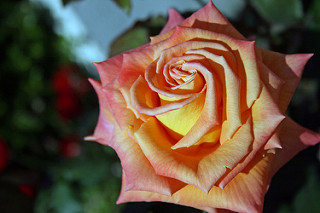

In [ ]:
PIL.Image.open(str(roses[2]))

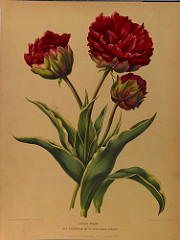

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[5]))

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/3634244527_e72c47842c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2960709681_e95940c0f0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2423565102_2f1a00bb1b_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4765063233_f64440c20b.jpg'),
 PosixPath('datasets/flower_photos/roses/15174615529_144ae28bdb_n.jpg')]

In [ ]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/3634244527_e72c47842c_n.jpg'

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [ ]:
img.shape

(240, 320, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=3)

Epoch 1/3
86/86 [==============================] - 110s 1s/step - loss: 1.3091 - accuracy: 0.4426
Epoch 2/3
86/86 [==============================] - 95s 1s/step - loss: 1.0008 - accuracy: 0.6050
Epoch 3/3
86/86 [==============================] - 98s 1s/step - loss: 0.8368 - accuracy: 0.6755


In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 10s 347ms/step - loss: 0.9220 - accuracy: 0.6514


[0.9220473170280457, 0.6514161229133606]

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 10s 330ms/step


array([[ 0.30721408,  0.6474432 ,  0.6803645 , -0.7349472 ,  0.24638644],
       [ 4.4820642 ,  0.35181788, -4.7402496 ,  2.9682364 ,  2.966738  ],
       [-2.094028  , -0.60585237,  2.5456638 ,  0.7290279 , -0.4064376 ],
       ...,
       [-0.05869007,  1.855423  ,  0.05319943,  0.44311818, -0.8821714 ],
       [ 2.7031784 , -2.0554173 , -2.6204813 ,  3.0952063 ,  2.1164625 ],
       [-0.2393153 ,  0.26102883, -0.11596072,  0.9023041 , -0.11570106]],
      dtype=float32)

In [ ]:
score = tf.nn.softmax(predictions[0])

In [ ]:
np.argmax(score)

2

In [ ]:
y_test[0]

1

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(180,
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

**Original Image**

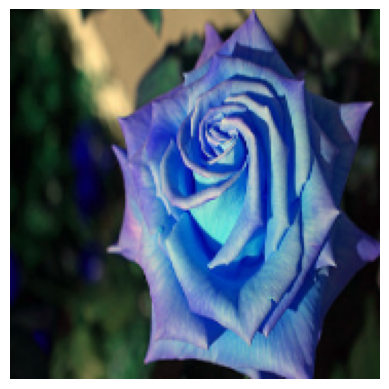

In [ ]:
plt.axis('off')
plt.imshow(X[2])

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=5)

In [ ]:
model.evaluate(X_test_scaled,y_test)

**You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 73.74%**